<a href="https://colab.research.google.com/github/Mgamez20/COVID-19-Data-Analysis/blob/main/COVID_19_Train_Val_95_77.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyDrive

In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Autorizar el acceso a tu propia cuenta de google drive, 
# siga el enlace, acepte y copie el codigo de verificación.

In [ ]:
# Suba la base de datos en formato zip a su google drive
# Del enlace para compartir del archivo "obtener enlace para compartir", 
# copie la parte "YOUR_FILE_ID" del enalce https://drive.google.com/open?id=YOUR_FILE_ID
# peguelo en la variable YOUR_FILE_ID en esta celda
# escriba el nombre del archivo en la variable filename

YOUR_FILE_ID = '1kEL9YqW4Ylrh0ilWdxvBUyuZ5kvMJnxe'

filename = 'DATASET_TRAIN_TEST_RES.zip'

download = drive.CreateFile({'id': YOUR_FILE_ID})
download.GetContentFile(filename)

import zipfile
zip_ref = zipfile.ZipFile(filename, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
%tensorflow_version 1.x
import os
from keras.preprocessing.image import ImageDataGenerator

#Dirección de la base de datos original
base_dir = 'DATASET_TRAIN_TEST_RES'
train_dir = os.path.join(base_dir, 'Train')
test_dir = os.path.join(base_dir, 'Test')

#Carpetas con imágenes de entrenamiento covid, neumonía y normal
train_covid_dir = os.path.join(train_dir,'COVID19')
train_normal_dir = os.path.join(train_dir,'Normal')
train_neumonia_dir = os.path.join(train_dir,'Neumonía')

#Verificación de imágenes entrenamiento
print('total training COVID images:', len(os.listdir(train_covid_dir)))
print('total training Normal images:', len(os.listdir(train_normal_dir)))
print('total training Neumonía images:', len(os.listdir(train_neumonia_dir)))

####################################################################################

#Carpetas con imágenes de verificación covid, neumonia y normal
test_covid_dir = os.path.join(test_dir,'COVID19')
test_normal_dir = os.path.join(test_dir,'Normal')
test_neumonia_dir = os.path.join(test_dir,'Neumonía')

#Verificación de imágenes verificación
print('\ntotal test COVID images:', len(os.listdir(test_covid_dir)))
print('total test Normal images:', len(os.listdir(test_normal_dir)))
print('total test Neumonía images:', len(os.listdir(test_neumonia_dir)))

TensorFlow 1.x selected.


Using TensorFlow backend.


total training COVID images: 450
total training Normal images: 450
total training Neumonía images: 450

total test COVID images: 150
total test Normal images: 150
total test Neumonía images: 150


In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator

#Pre-procesamiento de imágenes con Keras
batch_size = 30

train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=[0.8,1.0], horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224,224),
                                                    classes = ['COVID19','Normal','Neumonía'],
                                                    batch_size=135,
                                                    color_mode = "grayscale")
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224,224),
                                                  classes = ['COVID19','Normal','Neumonía'],
                                                  batch_size=45,
                                                  color_mode = "grayscale",
                                                  shuffle = False)

Found 1350 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


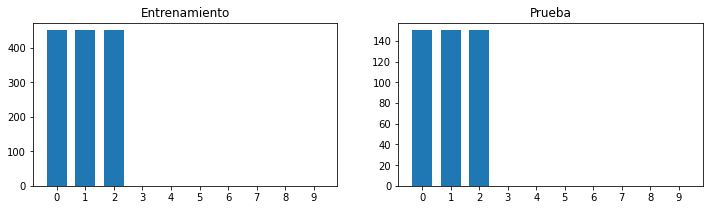

In [ ]:
# Histogramas
import matplotlib.pyplot as plt
import numpy as np

#se utilizan las "y" para poder contar
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.hist(train_generator.labels,bins=np.arange(-0.5,10.5,1.0), rwidth=0.7)
plt.title("Entrenamiento")
plt.xticks(range(10))

plt.subplot(1,2,2)
plt.hist(test_generator.labels,bins=np.arange(-0.5,10.5,1.0), rwidth=0.7)
plt.title("Prueba")
plt.xticks(range(10))

plt.show()

In [ ]:
#Arquitectura Modelo Neuronal 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout

COVID_MODEL = Sequential()


COVID_MODEL = Sequential()
COVID_MODEL.add(Conv2D(64, (4,4), strides=(1,1), padding ='valid', activation='relu', input_shape=(224,224,1))) #inputshape es el tamaño de la entrada nxn y el numero de planos de color
COVID_MODEL.add(MaxPooling2D(pool_size=(4,4), strides=(3,3)))

COVID_MODEL.add(Conv2D(240, (2,2), strides=(1,1), padding = 'valid', activation='relu'))
COVID_MODEL.add(MaxPooling2D(pool_size=(2,2), strides=(3,3)))

COVID_MODEL.add(Conv2D(160, (2,2), strides=(1,1), padding = 'valid', activation='relu'))
COVID_MODEL.add(MaxPooling2D(pool_size=(1,1), strides=(3,3)))

COVID_MODEL.add(Conv2D(80, (2,2), strides=(1,1), padding = 'valid', activation='relu'))
COVID_MODEL.add(MaxPooling2D(pool_size=(1,1), strides=(3,3)))

COVID_MODEL.add(Conv2D(40, (2,2), strides=(1,1), padding = 'valid', activation='relu'))
COVID_MODEL.add(MaxPooling2D(pool_size=(1,1), strides=(3,3)))

COVID_MODEL.add(Flatten())
COVID_MODEL.add(Dense(268, activation='relu')) #520
COVID_MODEL.add(Dense(80, activation='relu')) #520
COVID_MODEL.add(Dense(15, activation='relu')) #520
COVID_MODEL.add(Dense(3, activation='sigmoid')) #520



COVID_MODEL.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 221, 221, 64)      1088      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 240)       61680     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 240)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 160)       153760    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 160)         0         
______________________________________

In [ ]:
###Entrenamiento y Validación Modelo COVID_MODEL###
from keras.callbacks import ModelCheckpoint
from keras import optimizers



COVID_MODEL.compile(loss='categorical_crossentropy', optimizer=optimizers.Adamax(lr=1e-2), metrics=['acc']) 


checkpointer = ModelCheckpoint(filepath= "COVID_MODEL.h5", monitor='val_acc', verbose=0, 
                               save_best_only=True, mode='max', period=1)

h = COVID_MODEL.fit_generator(train_generator, 
                               steps_per_epoch=90, #(1260/10)*2 
                               epochs=50,
                              validation_data = test_generator, 
                               validation_steps=18,
                              callbacks=[checkpointer])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/50
90/90 [==============================] - 76s 845ms/step - loss: 0.7266 - acc: 0.6505 - val_loss: 1.0347 - val_acc: 0.8099
Epoch 2/50
90/90 [==============================] - 68s 758ms/step - loss: 0.4113 - acc: 0.8402 - val_loss: 0.4697 - val_acc: 0.9358
Epoch 3/50
90/90 [==============================] - 68s 759ms/step - loss: 0.2990 - acc: 0.8921 - val_loss: 0.0668 - val_acc: 0.8938
Epoch 4/50
90/90 [==============================] - 68s 761ms/step - loss: 0.2678 - acc: 0.8974 - val_loss: 0.2292 - val_acc: 0.8815
Epoch 5/50
90/90 [==============================] - 70s 779ms/step - loss: 0.2291 - acc: 0.9142 - val_loss: 0.1893 - val_acc: 0.9383
Epoch 6/50
90/90 [==============================] - 71s 785ms/step - loss: 0.2023 - acc: 0.9213 - val_loss: 0.3481 - val_acc: 0.9531
Epoch 7/50
90/90 [==============================] - 69s 771ms/step - loss: 0.1852 - acc: 0.9289 - val_loss:

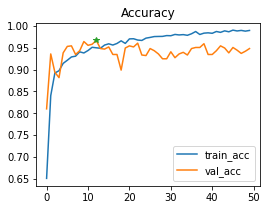

train acc = 0.9543209671974182
test acc = 0.970370352268219


In [ ]:
 ##Gráfica de entrenamiento modelo InceptionResNetV2 (1)##
import matplotlib.pyplot as plt
import numpy as np

epoch_max = np.argmax(h.history['val_acc'])
plt.figure(num=None, figsize=(4, 3))
plt.plot(h.history['acc'], label='train_acc')
plt.plot(h.history['val_acc'], label='val_acc')
plt.legend(loc='lower right')
plt.plot(epoch_max, h.history['val_acc'][epoch_max],'*')
plt.title('Accuracy')
plt.show()

COVID_MODEL.load_weights('COVID_MODEL.h5') #cambiar conforme al modelo (1)

##Porcentaje de Entrenamiento y Validación del Modelo InceptionResNetV2##
loss, acc = COVID_MODEL.evaluate_generator(train_generator, steps=90) #cambiar conforme al modelo
print('train acc =', acc)
loss, acc = COVID_MODEL.evaluate_generator(test_generator, steps=18) #cambiar conforme al modelo
print('test acc =', acc)

In [ ]:
#Matriz deconfusion chida
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model
import numpy as np
import cv2
import scipy as sp

modelo = COVID_MODEL

filenames = test_generator.filenames
nb_samples = len(filenames)
print(nb_samples)
predictions = modelo.predict_generator(test_generator, steps = 10) #Steps se multiplica con el tamaño del batch

Y_pred = predictions
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print(Y_pred.shape)
cm = confusion_matrix(test_generator.classes, y_pred)

450
Confusion Matrix
[[146   2   2]
 [  0 146   4]
 [  3   4 143]]
(450, 3)


In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt



def plot_confusion_matrix(cm, classes, normalize=False, title='Martiz de Confusión', cmap = plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Matriz de Confusión Normalizada")
  else:
    print("Matriz de Confusión sin Normalización")
  
  print(cm)

  thresh = cm.max() / 2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center",
             color="white" if cm[i,j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('Clase Verdadera')
  plt.xlabel('Clase Predicha')

Matriz de Confusión sin Normalización
[[143   1   6]
 [  2 145   3]
 [  3   4 143]]


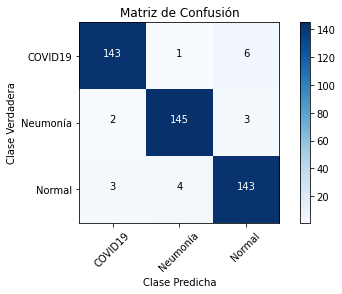

In [ ]:
cm_plot_labels = ['COVID19', 'Neumonía', 'Normal']
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, cm_plot_labels, title = 'Matriz de Confusión')

In [ ]:
#### MÉTRICAS MATRIZ DE CONFUSIÓN ###

#Verdadedos Positivos COVID = 89
#Verdaderos Positivos Neumonía = 85 
#Verdaderos Positivos Normal = 83 

#Falsos Negativos COVID = 1
#Falsos Negativos Neumonía = 5
#Falsos Negativos Normal =  7

#Falso Positivo COVID = 2
#Falso Positivo Neumonía = 5
#Falso Positivo Normal = 6

#Verdaderos Negativos COVID = 178
#Verdaderos Negativos Neumonía = 175
#Verdaderos Negativos Normal = 174


###Precisión (Accuracy)###
precision = (cm[0][0]+cm[1][1]+cm[2][2])/450
print ("Precisión: "+"{0:.3f}".format(precision*100)+"%")

###Exactitud (Precision)###
exactitud_covid = cm[0][0]/(cm[0][0]+cm[0][1]+cm[0][2])
print("\nExactitud COVID = "+"{0:.3f}".format(exactitud_covid*100)+"%")
exactitud_neumonia = cm[1][1]/(cm[1][0]+cm[1][1]+cm[1][2])
print("Exactitud Neumonía = "+"{0:.3f}".format(exactitud_neumonia*100)+"%")
exactitud_normal = cm[2][2]/(cm[2][0]+cm[2][1]+cm[2][2])
print("Exactitud Normal = "+"{0:.3f}".format(exactitud_normal*100)+"%")

###Sensivilidad (Recall)###
sensi_covid = cm[0][0]/(cm[0][0]+cm[0][1]+cm[0][2])
print("\nSensibilidad COVID = "+"{0:.3f}".format(sensi_covid*100)+"%")
sensi_neumonia = cm[1][1]/(cm[1][0]+cm[1][1]+cm[1][2])
print("Sensibilidad Neumonía = "+"{0:.3f}".format(sensi_neumonia*100)+"%")
sensi_normal = cm[2][2]/(cm[2][0]+cm[2][1]+cm[2][2])
print("Sensibilidad Normal = "+"{0:.3f}".format(sensi_normal*100)+"%")

###Especificidad (Specificity)###
esp_covid = (cm[1][1]+cm[1][2]+cm[2][1]+cm[2][2])/(cm[1][1]+cm[1][2]+cm[2][1]+cm[2][2]+cm[1][0]+cm[2][0])
print("\nEspecificidad COVID = "+"{0:.3f}".format(esp_covid*100)+"%")
esp_neumonia = (cm[0][0]+cm[2][0]+cm[2][2]+cm[0][2])/(cm[0][0]+cm[2][0]+cm[2][2]+cm[0][2]+cm[0][1]+cm[2][1])
print("Especificidad Neumonía = "+"{0:.3f}".format(esp_neumonia*100)+"%")
esp_normal = (cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]+cm[0][2]+cm[1][2])
print("Especificidad Normal = "+"{0:.3f}".format(esp_normal*100)+"%")

###F1###
f1_covid = cm[0][0]/(cm[0][0]+((cm[0][1]+cm[0][2]+cm[1][0]+cm[2][0])/2))
print("\nF1 COVID = "+"{0:.3f}".format(f1_covid*100)+"%")
f1_neumonia = cm[1][1]/(cm[1][1]+((cm[1][0]+cm[1][2]+cm[0][1]+cm[2][1])/2))
print("F1 Neumonia = "+"{0:.3f}".format(f1_neumonia*100)+"%")
f1_normal = cm[2][2]/(cm[2][2]+((cm[2][0]+cm[2][1]+cm[0][2]+cm[1][2])/2))
print("F1 Neumonia = "+"{0:.3f}".format(f1_normal*100)+"%")

Precisión: 95.778%

Exactitud COVID = 95.333%
Exactitud Neumonía = 96.667%
Exactitud Normal = 95.333%

Sensibilidad COVID = 95.333%
Sensibilidad Neumonía = 96.667%
Sensibilidad Normal = 95.333%

Especificidad COVID = 98.333%
Especificidad Neumonía = 98.333%
Especificidad Normal = 97.000%

F1 COVID = 95.973%
F1 Neumonia = 96.667%
F1 Neumonia = 94.702%
